In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [25]:
def read_result_file(filename):
    nets = []  # 儲存所有網路的資料
    current_net = None
    
    with open(filename, 'r') as file:
        for line in file:
            line = line.strip()
            if not line:  # 跳過空行
                continue
                
            if line.startswith('N'):  # 新網路開始
                if current_net is not None:
                    nets.append(current_net)
                current_net = {
                    'name': line,
                    'pins': [],
                    'path': []
                }
            elif line == 'Pins':  # Pins 標記
                current_section = 'pins'
            elif line == 'Routing Path':  # Routing Path 標記
                current_section = 'path'
            else:  # 座標數據
                parts = line.split()
                if len(parts) == 2:
                    point = (int(parts[0]), int(parts[1]))
                    if current_section == 'pins':
                        current_net['pins'].append(point)
                    elif current_section == 'path':
                        current_net['path'].append(point)
        
        # 添加最後一個網路
        if current_net is not None:
            nets.append(current_net)
    
    return nets

In [26]:
def plot_nets(nets, SIZE):
    plt.figure(figsize=(12, 12))
    
    # 绘制黑粗线标示
    for x in [0, 8, 16, 24, 32, 40]:
        plt.axvline(x=x, color='black', linestyle='-', linewidth=3, alpha=0.3)
    for y in [0, 10, 20, 30, 40]:
        plt.axhline(y=y, color='black', linestyle='-', linewidth=3, alpha=0.3)

    # 创建颜色循环
    colors = plt.cm.tab20(np.linspace(0, 1, len(nets)))
    
    for i, net in enumerate(nets):
        color = colors[i]
        net_name = net['name']
        
        # 绘制路由路径 (线条)
        if net['path']:
            path_segments = []
            current_segment = [net['path'][0]]
            
            # 将路径分割成连续的段
            for j in range(1, len(net['path'])):
                prev = net['path'][j-1]
                curr = net['path'][j]
                
                # 检查是否相邻 (曼哈顿距离<=1)
                # if abs(curr[0] - prev[0]) <= 1 and abs(curr[1] - prev[1]) <= 1:
                if (abs(curr[0] - prev[0]) + abs(curr[1] - prev[1])) == 1:
                    current_segment.append(curr)
                else:
                    if len(current_segment) > 1:
                        path_segments.append(current_segment)
                    current_segment = [curr]
            
            if len(current_segment) > 1:
                path_segments.append(current_segment)
            
            # 绘制每个连续的段
            for segment in path_segments:
                seg_x, seg_y = zip(*segment)
                plt.plot(seg_x, seg_y, color=color, linestyle='-', 
                        linewidth=2, alpha=0.7, label=f'{net_name} Path' if segment == path_segments[0] else "")
                
                # 绘制箭头 (仅在相邻点间)
                for j in range(len(segment)-1):
                    x1, y1 = segment[j]
                    x2, y2 = segment[j+1]
                    plt.arrow(x1, y1, (x2-x1)*0.9, (y2-y1)*0.9, 
                             shape='full', color=color, length_includes_head=True,
                             head_width=0.3, head_length=0.4, alpha=0.5)
        
        # 绘制接点 (pins)
        if net['pins']:
            pins_x, pins_y = zip(*net['pins'])
            plt.scatter(pins_x, pins_y, color=color, marker='o', 
                       s=200, edgecolors='black', linewidths=1.5,
                       label=f'{net_name} Pins')
            
            # 标示接点
            for j, (x, y) in enumerate(net['pins']):
                plt.text(x, y, f'{net_name}', ha='center', va='center', 
                         color='white', fontsize=6, fontweight='bold')
    
    # 设置坐标轴
    plt.xlim(-1, SIZE +1)
    plt.ylim(-1, SIZE +1)
    plt.grid(True, which='both', linestyle=':', alpha=0.7)
    plt.xticks(range(0, SIZE + 1, 1))
    plt.yticks(range(0, SIZE + 1, 1))
    plt.gca().set_aspect('equal', adjustable='box')
    
    # 显示图例
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.title("Routing Result")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    
    plt.tight_layout()
    plt.show()

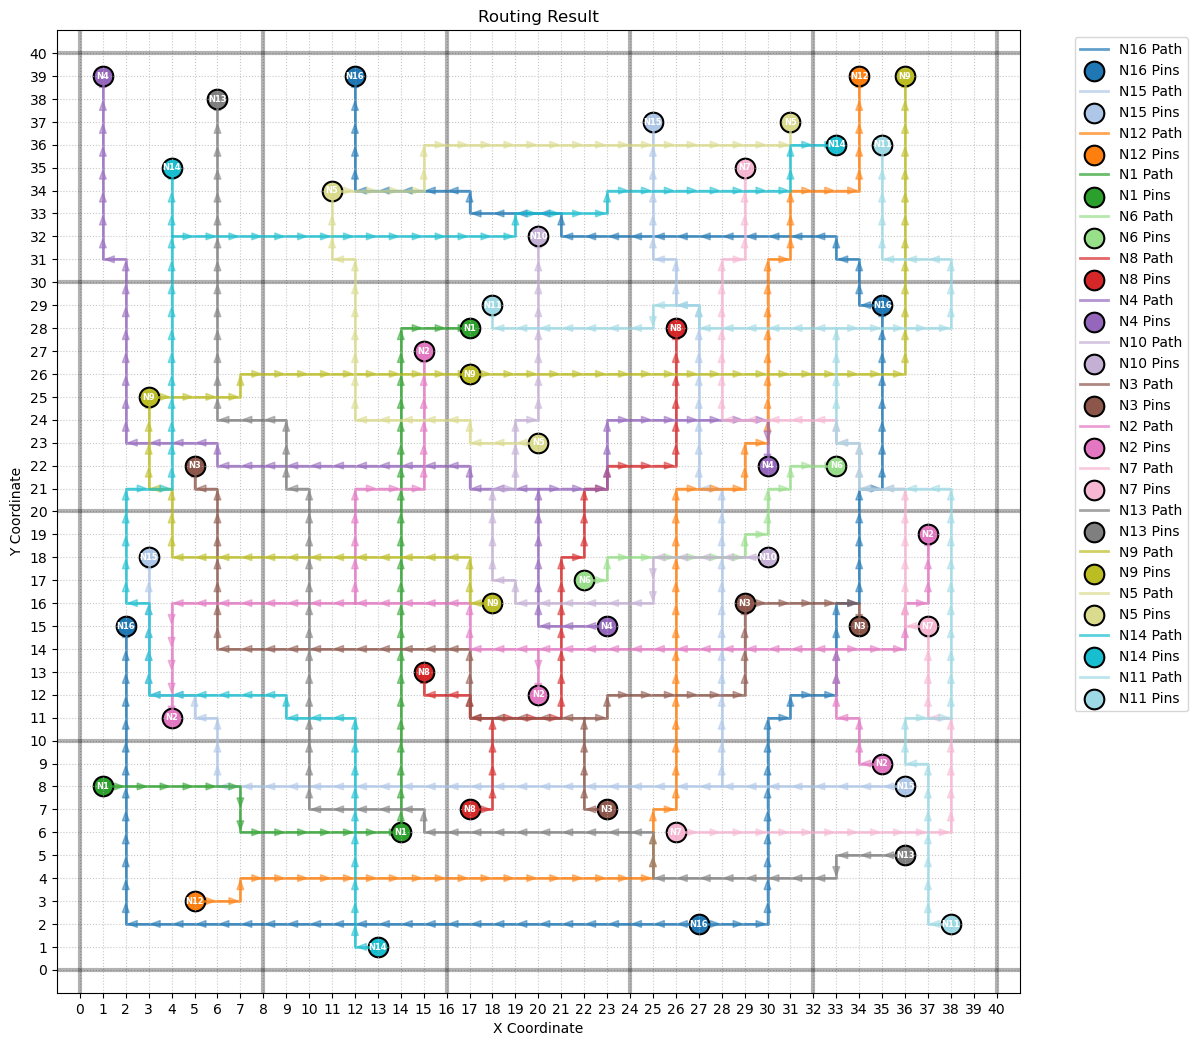

In [27]:
if __name__ == "__main__":
    nets = read_result_file("result_succeed_0.txt")
    plot_nets(nets, 40)